### librerias

In [ ]:
pip install heapq

In [ ]:
pip install networkx

In [8]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt

distancias mas corta desde el nodo 0
nodo: 0, distancia: 0
nodo: 1, distancia: 2
nodo: 2, distancia: 6
nodo: 3, distancia: 7
nodo: 4, distancia: 17
nodo: 5, distancia: 22
nodo: 6, distancia: 19


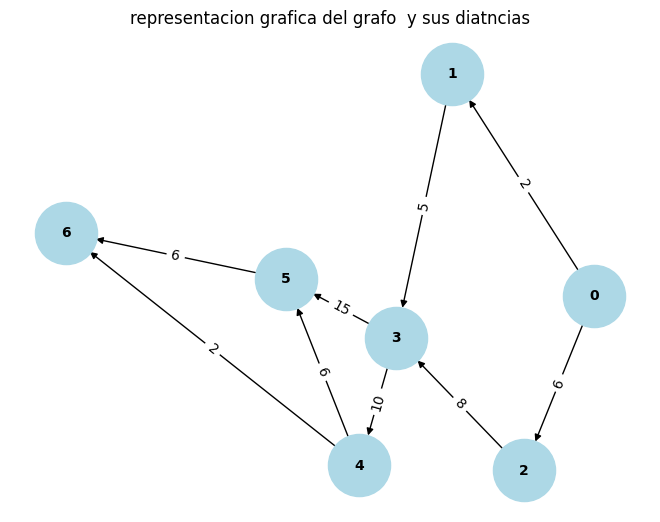

In [9]:
def  dijkstra(grafo,nodo_origen):
    #iniciliazar las diastancias mas cortas a infinito
    distancias = {nodo: float("inf") for nodo in grafo}
    distancias[nodo_origen] = 0 # se le indica  que las distancias al nodo origen es 0

    #cola para determinar las exploracion de nodos
    cola_prioridad =[(0,nodo_origen)] 

    #miestras haya nodos, va a explorar
    while cola_prioridad:
        #obtener nodo con menos distancias, por primera vez sabemos que es de 0
        distancia_actual, nodo_actual = heapq.heappop(cola_prioridad)

        # si la distancia actual es mayor a la registrada, continuar 
        if distancia_actual > distancias[nodo_actual]:
            continue

        #explorar los vecinos del nodo actual(cercanos)
        for vecino, peso in grafo[nodo_actual].items():
            #calcular la distancia al vecino atravez del nodo actual
            nueva_distancia = distancia_actual + peso

            # si la nueva distancia es menor que la resgistrada,actualizar 
            if nueva_distancia<distancias[vecino]:
                distancias[vecino] = nueva_distancia
                # agregar el vecino a la cola de prioridad 
                heapq.heappush(cola_prioridad,(nueva_distancia,vecino))
    return distancias        


def graficar_grafo(grafo):
    Grafox = nx.DiGraph()

    #añadir los nods y alas aristas con peso
    for nodo,vecinos in grafo.items():
        for vecino, peso in vecinos.items():
            Grafox.add_edge(nodo,vecino,weight=peso)

    pos = nx.spring_layout(Grafox)
    
    # dibujar los nodos y aristas 
    nx.draw(Grafox,pos,with_labels = True,node_color ="lightblue",node_size=2000, font_size=10, font_weight="bold")
    # dibujar las etiquetas de las aristas(pesos)
    labels= nx.get_edge_attributes(Grafox,"weight")
    nx.draw_networkx_edge_labels(Grafox, pos, edge_labels=labels,font_size=10)

    #mostar la grafica

    plt.title("representacion grafica del grafo  y sus diatncias")
    plt.show()

grafo={
    "0":{"1":2, "2":6},
    "1":{"3":5},
    "2":{"3":8},
    "3":{"5":15, "4":10},
    "4":{"5":6, "6":2},
    "5":{"6":6},
    "6":{},
}

#ejecucion del alg dijkstra
resultado= dijkstra(grafo,'0')

#recorrido de la lista resultado
print('distancias mas corta desde el nodo 0')
for nodo, distancia in resultado.items():
    print(f"nodo: {nodo}, distancia: {distancia}")

#graficar 
graficar_grafo(grafo)

